<a href="https://colab.research.google.com/github/jh17sh21-oss/gendered-racism-dataset/blob/main/TopicModeling_BERT_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install bertopic gensim scikit-learn sentence-transformers tqdm openpyxl

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.1/62.1 kB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.6/16.6 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.
cupy-cu

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 153.0/153.0 kB 14.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.6/26.6 MB 29.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.0/18.0 MB 55.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.2/38.2 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found exi

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sentence_transformers import SentenceTransformer
from google.colab import files

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for filename in uploaded:
    if filename.endswith(".xlsx"):
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
    elif filename.endswith(".csv"):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    else:
        raise ValueError("ÏßÄÏõêÎêòÏßÄ ÏïäÎäî ÌååÏùº ÌòïÏãùÏûÖÎãàÎã§. .xlsx ÎòêÎäî .csvÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.")

Saving topic_rawdata.xlsx to topic_rawdata.xlsx


In [ ]:
stopwords = set([
    'Í∑∏', 'Ïù¥', 'Ï†Ä', 'Í≤É', 'Îì±', 'Îïå', 'Ï§ë', 'ÎàÑÍµ¨', 'Î¨¥Ïóá', 'ÌïòÎã§', 'ÎêòÎã§', 'ÏûàÎã§', 'ÏóÜÎã§', 'Î∞õÎã§',
    'Í∞ÄÎã§', 'Ïò§Îã§', 'Î≥¥Îã§', 'Ï£ºÎã§', 'ÎßêÌïòÎã§', 'Îì§Îã§', 'Í≥ÑÏÜç', 'Ïù¥Ï†ú', 'ÏßÄÍ∏à', 'ÏòàÏ†Ñ', 'ÏöîÏ¶ò', 'Í±∞Ïùò',
    'Ï¢Ä', 'ÎßéÏù¥', 'Îçî', 'Îã§Ïãú', 'Î≥ÑÎ°ú', 'Í∑∏Î¶¨Í≥†', 'Í∑∏ÎûòÏÑú', 'Í∑∏Îü∞Îç∞', 'ÌïòÏßÄÎßå', 'Í∑∏Îü¨ÎãàÍπå', 'ÎïåÎ¨∏',
    'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Ïñ¥Îñ§', 'Í∞ôÎã§', 'ÎÇò', 'ÎÇ¥', 'ÎÑà', 'Ïö∞Î¶¨', 'ÎãπÏã†', 'Í∑∏ÎÖÄ', 'Í∑∏Îì§', 'ÏÇ¨Îûå', 'Î™®Îëê',
    'Ïó¨Í∏∞', 'Ï†ÄÍ∏∞', 'Í±∞Í∏∞', 'Ïïà', 'Î∞ñ', 'ÏúÑ', 'ÏïÑÎûò', 'Í∑∏Í≥≥', 'Î∞©Ìñ•', 'ÎèÑ', 'Îäî', 'Îßå', 'Í≥º', 'ÏôÄ',
    'Î≥¥Îã§', 'ÍπåÏßÄ', 'Î∂ÄÌÑ∞', 'ÏúºÎ°ú', 'ÏóêÍ≤å', 'Ïù¥Îûë', 'Î∞ñÏóê', 'Ï°∞Ï∞®', 'Ï†ïÎèÑ', 'Í≤ΩÏö∞', 'ÎÇ¥Ïö©', 'Î¨∏Ï†ú',
    'Ïù¥ÏïºÍ∏∞', 'Î™®Ïäµ', 'ÏÉÅÌô©', 'ÏûêÏã†', 'Ïùå', 'Ïùë', 'Ïò§', 'Ïñ¥Ìú¥', 'Ìóà', 'ÏïÑÏù¥Í≥†', 'ÏóêÌú¥', 'ÏõÉÏùå',
    'Í∑∏ÎñÑ', 'Í∑∏Îã§Ïùå', 'ÏïÑÎßà', '...', '‚Ä¶', '‚Äú', '‚Äù', '‚Äò', '‚Äô', '-', '--', '‚Äï', 'Í∑∏ÎÉ•', 'ÏßÑÏßú', 'ÏôÑÏ†Ñ',
    'ÏïΩÍ∞Ñ', 'Ïñ¥ÎñªÍ≤å', 'Î≠ê', 'Îî±', 'Îßâ', 'Îòê', 'ÎòêÎäî', 'Ìï¥ÎèÑ', 'ÏÉùÍ∞Å', 'Ï§ëÎûµ', 'Í∞ÄÏßÄ', 'Ï°∞Í∏à',
    'Îã§Î¨∏Ìôî', 'Ï§ëÍµ≠', 'ÏùºÎ≥∏', 'ÌïúÍµ≠', 'Ïö∞Ï¶àÎ≤†ÌÇ§Ïä§ÌÉÑ', 'Î≤†Ìä∏ÎÇ®', 'ÌÉúÍµ≠', 'Î™ΩÍ≥®', 'Î™ΩÍ≥†',
    'ÏûêÍ∏∞', 'Í∑∏Îïå', 'Í∑∏Í±∞', 'ÏàòÎèÑ', 'Í∑∏Í≤å', 'Ïó¨Îü¨', 'Î¨¥Ïä®', 'ÎÑ§ÎÑ§', 'ÎÇòÏù¥', 'Ïñ¥Îîî', 'Î®ºÏ†Ä', 'ÎåÄÎ∂ÄÎ∂Ñ',
    'ÎÇòÏ§ë', 'ÎåÄÌï¥', 'Í∑∏Í≤É', 'Î≠îÍ∞Ä', 'Ï†ÑÌòÄ', 'Ï†ÄÌù¨', 'ÎßåÏïΩ', 'Ïù¥Ï£º', 'ÎÇòÍ∞ÄÏïº', 'Îã§Î•∏', 'Ìï≠ÏÉÅ',
    'ÏñòÍ∏∞',
])

standardization_dict = {
    "ÏïÑÎπ†": "ÎÇ®Ìé∏", "Ïó¨Ïûê": "Ïó¨ÏÑ±", "ÏïÑÍ∏∞": "ÏïÑÏù¥", "ÌïúÍµ≠Îßê": "ÌïúÍµ≠Ïñ¥",
    "ÏãúÏóÑÎßà": "ÏãúÏñ¥Î®∏Îãà", "Ïñ¥Î®∏Îãà": "ÏãúÏñ¥Î®∏Îãà", "ÎåÄÌïúÎØºÍµ≠": "ÌïúÍµ≠",
    "Ïô∏Íµ≠": "Ïô∏Íµ≠Ïù∏", "Ïô∏Íµ≠ÏÇ¨Îûå": "Ïô∏Íµ≠Ïù∏", "Ï∞®Î≥ÑÏ†Å": "Ï∞®Î≥Ñ", "Î¨¥ÏãúÎãπÌï®": "Î¨¥Ïãú",
    "Î¨¥ÏãúÌï®": "Î¨¥Ïãú", "Ìé∏Í≤¨Îì§": "Ìé∏Í≤¨", "ÌöåÏÇ¨": "ÏßÅÏû•", "ÏóÖÎ¨¥": "ÏßÅÏû•",
    "Ïùº": "ÏßÅÏû•", "ÌöåÏÇ¨ÏÉùÌôú": "ÏßÅÏû•", "Îßê": "Ïñ∏Ïñ¥", "ÌïúÍµ≠ÏÇ¨Îûå": "ÌïúÍµ≠Ïù∏"
}
def clean_text(text):
    words = text.split()
    processed = []
    for word in words:
        word = standardization_dict.get(word, word)
        if word not in stopwords:
            processed.append(word)
    return " ".join(processed)

In [ ]:
docs_cleaned = [
    clean_text(text)
    for text in df["ÏõêÏûêÎ£å"].dropna().astype(str).tolist()
]

In [ ]:
def preprocess_text(text, stopwords, standardization_dict):
    words = text.split()
    processed = []
    for word in words:
        word = standardization_dict.get(word, word)
        if word not in stopwords:
            processed.append(word)
    return processed

docs_tokenized = [preprocess_text(doc, stopwords, standardization_dict)
    for doc in docs_cleaned]

from gensim.corpora import Dictionary
id2word = Dictionary(docs_tokenized)

In [ ]:
topic_nums = list(range(3, 21))

results = []

embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

for n in tqdm(topic_nums):
    topic_model = BERTopic(
        embedding_model=embedding_model,
        language="multilingual",
        calculate_probabilities=False,
        low_memory=True,
        n_gram_range=(1, 3)
    )

    topics, probs = topic_model.fit_transform(docs_cleaned)

    reduced_model = topic_model.reduce_topics(docs_cleaned, nr_topics=n)

    keywords = [reduced_model.get_topic(i) for i in range(n)]
    keywords = [topic for topic in keywords if topic]
    topic_words = [[word for word, _ in topic] for topic in keywords]

    topic_reprs = reduced_model.topic_embeddings_
    sim_matrix = cosine_similarity(topic_reprs)
    upper_tri = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
    similarity = np.mean(upper_tri)
    cosine_distance = 1 - similarity

    cm = CoherenceModel(
        topics=topic_words,
        texts=docs_tokenized,
        dictionary=id2word,
        coherence='c_v',
        processes=1)
    coherence = cm.get_coherence()

    results.append({
        "ÌÜ†ÌîΩÏàò": n,
        "ÏΩîÏÇ¨Ïù∏Í±∞Î¶¨(Cosine Distance)": cosine_distance,
        "ÏùºÍ¥ÄÏÑ±(Coherence)": coherence
    })

results_df = pd.DataFrame(results)
results_df

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [10:57<00:00, 36.55s/it]


ÌÜ†ÌîΩÏàò  ÏΩîÏÇ¨Ïù∏Í±∞Î¶¨(Cosine Distance)  ÏùºÍ¥ÄÏÑ±(Coherence)
0     3                0.175118        0.275428
1     4                0.236234        0.291719
2     5                0.283592        0.304225
3     6                0.298645        0.333401
4     7                0.317334        0.320533
5     8                0.011541        0.297234
6     9                0.014158        0.326030
7    10                0.019397        0.331499
8    11                0.017357        0.322253
9    12                0.020917        0.324230
10   13                0.013230        0.338094
11   14                0.015816        0.327709
12   15                0.017317        0.325257
13   16                0.016882        0.323165
14   17                0.014371        0.334579
15   18                0.016536        0.337213
16   19                0.021994        0.328979
17   20                0.024486        0.354819

In [ ]:
from google.colab import files

output_path = "/content/ÌÜ†ÌîΩÏàò_ÏΩîÏÇ¨Ïù∏Í±∞Î¶¨_ÏΩîÌûàÎü∞Ïä§Í≤∞Í≥º.xlsx"
results_df.to_excel(output_path, index=False)
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving RawDaTa.xlsx to RawDaTa.xlsx


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

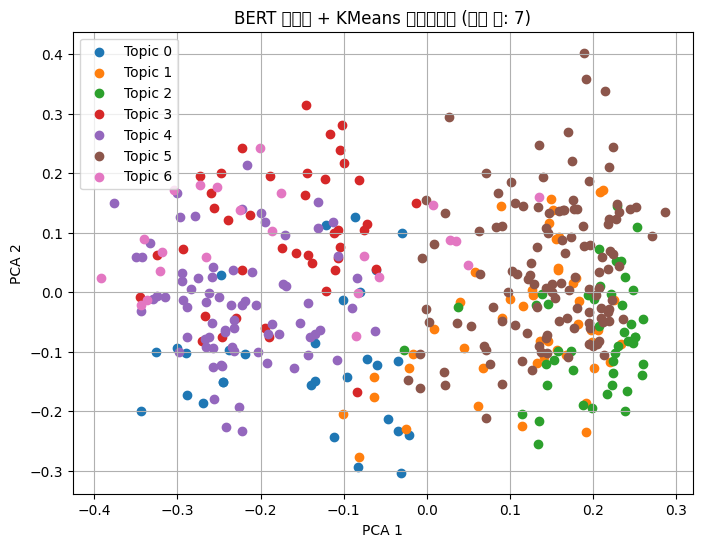

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install -q sentence-transformers scikit-learn openpyxl

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

uploaded = files.upload()

for filename in uploaded:
    if filename.endswith(".xlsx"):
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
    elif filename.endswith(".csv"):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    else:
        raise ValueError("ÏßÄÏõêÎêòÏßÄ ÏïäÎäî ÌååÏùº ÌòïÏãùÏûÖÎãàÎã§.")

stopwords = set([
    'Í∑∏', 'Ïù¥', 'Ï†Ä', 'Í≤É', 'Îì±', 'Îïå', 'Ï§ë', 'ÎàÑÍµ¨', 'Î¨¥Ïóá', 'ÌïòÎã§', 'ÎêòÎã§', 'ÏûàÎã§', 'ÏóÜÎã§', 'Î∞õÎã§',
    'Í∞ÄÎã§', 'Ïò§Îã§', 'Î≥¥Îã§', 'Ï£ºÎã§', 'ÎßêÌïòÎã§', 'Îì§Îã§', 'Í≥ÑÏÜç', 'Ïù¥Ï†ú', 'ÏßÄÍ∏à', 'ÏòàÏ†Ñ', 'ÏöîÏ¶ò', 'Í±∞Ïùò',
    'Ï¢Ä', 'ÎßéÏù¥', 'Îçî', 'Îã§Ïãú', 'Î≥ÑÎ°ú', 'Í∑∏Î¶¨Í≥†', 'Í∑∏ÎûòÏÑú', 'Í∑∏Îü∞Îç∞', 'ÌïòÏßÄÎßå', 'Í∑∏Îü¨ÎãàÍπå', 'ÎïåÎ¨∏',
    'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Ïñ¥Îñ§', 'Í∞ôÎã§', 'ÎÇò', 'ÎÇ¥', 'ÎÑà', 'Ïö∞Î¶¨', 'ÎãπÏã†', 'Í∑∏ÎÖÄ', 'Í∑∏Îì§', 'ÏÇ¨Îûå', 'Î™®Îëê',
    'Ïó¨Í∏∞', 'Ï†ÄÍ∏∞', 'Í±∞Í∏∞', 'Ïïà', 'Î∞ñ', 'ÏúÑ', 'ÏïÑÎûò', 'Í∑∏Í≥≥', 'Î∞©Ìñ•', 'ÎèÑ', 'Îäî', 'Îßå', 'Í≥º', 'ÏôÄ',
    'Î≥¥Îã§', 'ÍπåÏßÄ', 'Î∂ÄÌÑ∞', 'ÏúºÎ°ú', 'ÏóêÍ≤å', 'Ïù¥Îûë', 'Î∞ñÏóê', 'Ï°∞Ï∞®', 'Ï†ïÎèÑ', 'Í≤ΩÏö∞', 'ÎÇ¥Ïö©', 'Î¨∏Ï†ú',
    'Ïù¥ÏïºÍ∏∞', 'Î™®Ïäµ', 'ÏÉÅÌô©', 'ÏûêÏã†', 'Ïùå', 'Ïùë', 'Ïò§', 'Ïñ¥Ìú¥', 'Ìóà', 'ÏïÑÏù¥Í≥†', 'ÏóêÌú¥', 'ÏõÉÏùå',
    'Í∑∏ÎñÑ', 'Í∑∏Îã§Ïùå', 'ÏïÑÎßà', '...', '‚Ä¶', '‚Äú', '‚Äù', '‚Äò', '‚Äô', '-', '--', '‚Äï', 'Í∑∏ÎÉ•', 'ÏßÑÏßú', 'ÏôÑÏ†Ñ',
    'ÏïΩÍ∞Ñ', 'Ïñ¥ÎñªÍ≤å', 'Î≠ê', 'Îî±', 'Îßâ', 'Îòê', 'ÎòêÎäî', 'Ìï¥ÎèÑ', 'ÏÉùÍ∞Å', 'Ï§ëÎûµ', 'Í∞ÄÏßÄ', 'Ï°∞Í∏à',
    'Îã§Î¨∏Ìôî', 'Ï§ëÍµ≠', 'ÏùºÎ≥∏', 'ÌïúÍµ≠', 'Ïö∞Ï¶àÎ≤†ÌÇ§Ïä§ÌÉÑ', 'Î≤†Ìä∏ÎÇ®', 'ÌÉúÍµ≠', 'Î™ΩÍ≥®', 'Î™ΩÍ≥†',
    'ÏûêÍ∏∞', 'Í∑∏Îïå', 'Í∑∏Í±∞', 'ÏàòÎèÑ', 'Í∑∏Í≤å', 'Ïó¨Îü¨', 'Î¨¥Ïä®', 'ÎÑ§ÎÑ§', 'ÎÇòÏù¥', 'Ïñ¥Îîî', 'Î®ºÏ†Ä', 'ÎåÄÎ∂ÄÎ∂Ñ',
    'ÎÇòÏ§ë', 'ÎåÄÌï¥', 'Í∑∏Í≤É', 'Î≠îÍ∞Ä', 'Ï†ÑÌòÄ', 'Ï†ÄÌù¨', 'ÎßåÏïΩ', 'Ïù¥Ï£º', 'ÎÇòÍ∞ÄÏïº', 'Îã§Î•∏', 'Ìï≠ÏÉÅ',
    'ÏñòÍ∏∞', 'ÎÇòÎùº', 'Î∂ÄÎ∂Ñ', 'ÏÑ†ÏÉùÎãò'
])

standardization_dict = {
    "ÏïÑÎπ†": "ÎÇ®Ìé∏", "Ïó¨Ïûê": "Ïó¨ÏÑ±", "ÏïÑÍ∏∞": "ÏïÑÏù¥", "ÌïúÍµ≠Îßê": "ÌïúÍµ≠Ïñ¥",
    "ÏãúÏóÑÎßà": "ÏãúÏñ¥Î®∏Îãà", "Ïñ¥Î®∏Îãà": "ÏãúÏñ¥Î®∏Îãà", "ÎåÄÌïúÎØºÍµ≠": "ÌïúÍµ≠",
    "Ïô∏Íµ≠": "Ïô∏Íµ≠Ïù∏", "Ïô∏Íµ≠ÏÇ¨Îûå": "Ïô∏Íµ≠Ïù∏", "Ï∞®Î≥ÑÏ†Å": "Ï∞®Î≥Ñ", "Î¨¥ÏãúÎãπÌï®": "Î¨¥Ïãú",
    "Î¨¥ÏãúÌï®": "Î¨¥Ïãú", "Ìé∏Í≤¨Îì§": "Ìé∏Í≤¨", "ÌöåÏÇ¨": "ÏßÅÏû•", "ÏóÖÎ¨¥": "ÏßÅÏû•",
    "Ïùº": "ÏßÅÏû•", "ÌöåÏÇ¨ÏÉùÌôú": "ÏßÅÏû•", "Îßê": "Ïñ∏Ïñ¥", "ÌïúÍµ≠ÏÇ¨Îûå": "ÌïúÍµ≠Ïù∏"
}

def preprocess_text(text):
    words = text.split()
    cleaned = []
    for word in words:
        word = standardization_dict.get(word, word)
        if word not in stopwords:
            cleaned.append(word)
    return " ".join(cleaned)

sentences = [preprocess_text(doc) for doc in df["ÏõêÏûêÎ£å"].dropna().astype(str).tolist()]

model = SentenceTransformer("distiluse-base-multilingual-cased-v2")
embeddings = model.encode(sentences)

num_topics = 7
kmeans = KMeans(n_clusters=num_topics, random_state=42)
labels = kmeans.fit_predict(embeddings)

df = df.loc[df["ÏõêÏûêÎ£å"].notna()].copy()
df["ÌÜ†ÌîΩÎ≤àÌò∏"] = labels

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)
df["x"] = reduced[:, 0]
df["y"] = reduced[:, 1]

plt.figure(figsize=(8, 6))
for label in sorted(set(labels)):
    subset = df[df["ÌÜ†ÌîΩÎ≤àÌò∏"] == label]
    plt.scatter(subset["x"], subset["y"], label=f"Topic {label}")
plt.title("BERT ÏûÑÎ≤†Îî© + KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÌÜ†ÌîΩ Ïàò: 7)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

output_path = "/content/ÏµúÏ¢Ö_ÌÜ†ÌîΩ_Î∂ÑÏÑùÍ≤∞Í≥º_7Í∞ú.xlsx"
df.to_excel(output_path, index=False)
files.download(output_path)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NanumBarunGothic.ttf to NanumBarunGothic (1).ttf


In [7]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

font_path = "/content/NanumBarunGothic.ttf"
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

mpl.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [8]:
topic_labels = {
    0: "Ïô∏Î™®/Ï∂úÏã† Íµ≠Í∞ÄÏóê ÎåÄÌïú Ìé∏Í≤¨",
    1: "ÍµêÏú°Ïû•Î©¥ÏóêÏÑú Î∞úÏÉùÌïòÎäî Ï∞®Î≥Ñ",
    2: "Ïñ∏Ïñ¥Ïóê ÎåÄÌïú Ï∞®Î≥Ñ",
    3: "Î¨¥ÏãúÏôÄ Ïù∏Í≤©Ï†Å Í≤ΩÏãú",
    4: "ÏÇ¨ÌöåÏ†Å Î∞∞Ï†úÏôÄ ÏÜåÏô∏ÏãúÌÇ¥",
    5: "Ï†úÎèÑÏ†Å ÎÇôÏù∏Í≥º ÏùòÏã¨",
    6: "ÏÑ±Ïó≠Ìï† Í≥†Ï†ïÍ¥ÄÎÖê"
}

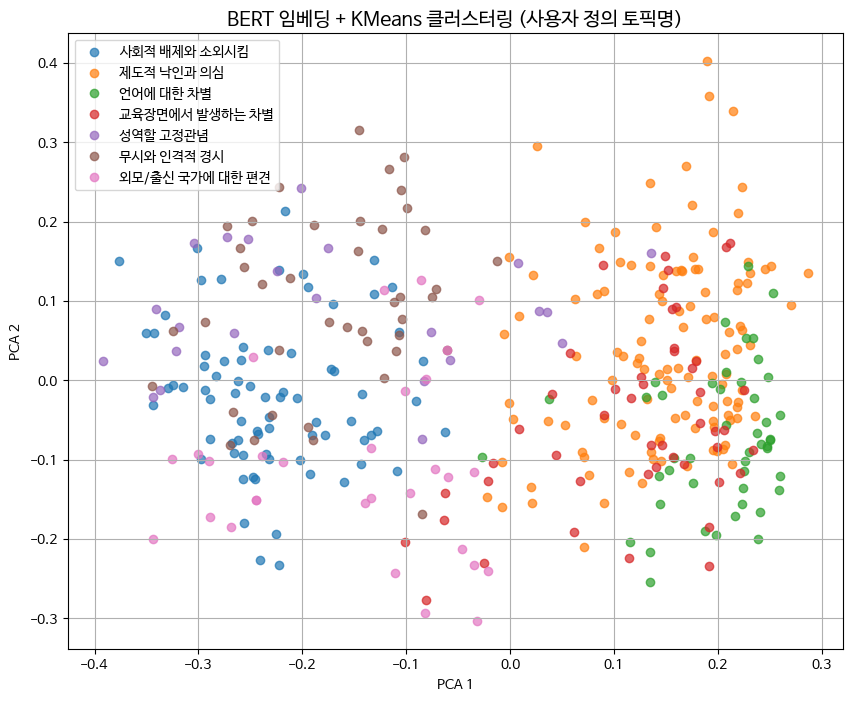

In [9]:
import matplotlib.pyplot as plt

topic_labels = {
    0: "Ïô∏Î™®/Ï∂úÏã† Íµ≠Í∞ÄÏóê ÎåÄÌïú Ìé∏Í≤¨",
    1: "ÍµêÏú°Ïû•Î©¥ÏóêÏÑú Î∞úÏÉùÌïòÎäî Ï∞®Î≥Ñ",
    2: "Ïñ∏Ïñ¥Ïóê ÎåÄÌïú Ï∞®Î≥Ñ",
    3: "Î¨¥ÏãúÏôÄ Ïù∏Í≤©Ï†Å Í≤ΩÏãú",
    4: "ÏÇ¨ÌöåÏ†Å Î∞∞Ï†úÏôÄ ÏÜåÏô∏ÏãúÌÇ¥",
    5: "Ï†úÎèÑÏ†Å ÎÇôÏù∏Í≥º ÏùòÏã¨",
    6: "ÏÑ±Ïó≠Ìï† Í≥†Ï†ïÍ¥ÄÎÖê"
}

plt.figure(figsize=(10, 8))
for topic_num in df['ÌÜ†ÌîΩÎ≤àÌò∏'].unique():
    subset = df[df['ÌÜ†ÌîΩÎ≤àÌò∏'] == topic_num]
    plt.scatter(subset['x'], subset['y'], label=topic_labels[topic_num], alpha=0.7)

plt.title("BERT ÏûÑÎ≤†Îî© + KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌÜ†ÌîΩÎ™Ö)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Î¨∏Ïû• ‚Üí ÏõêÎ¨∏ Î¶¨Ïä§Ìä∏
original_sentences = df["ÏõêÏûêÎ£å"].tolist()

# Í∞Å ÌÜ†ÌîΩÎ≥Ñ ÎåÄÌëú Î¨∏Ïû• Ï∂îÏ∂ú
for topic_idx in range(7):
    print(f"\nüß© ÌÜ†ÌîΩ {topic_idx} ÎåÄÌëú Î¨∏Ïû•:")

    # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Í≥º Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    center_vector = kmeans.cluster_centers_[topic_idx].reshape(1, -1)
    sims = cosine_similarity(center_vector, embeddings)[0]

    # Ìï¥Îãπ ÌÜ†ÌîΩÏóê ÏÜçÌïú Î¨∏Ïû• Ï§ë Ïú†ÏÇ¨ÎèÑ ÎÜíÏùÄ Ïàú
    topic_sentences_idx = np.where(labels == topic_idx)[0]
    top_idxs = topic_sentences_idx[np.argsort(sims[topic_sentences_idx])[::-1][:5]]

    for idx in top_idxs:
        print(f"- {original_sentences[idx]}")


üß© ÌÜ†ÌîΩ 0 ÎåÄÌëú Î¨∏Ïû•:
- ÏÇ¨ÏÜåÌïú Î∂ÄÎ∂ÑÏóêÏÑú Í∑∏Îü∞ Í≤ÉÎì§Ïù¥ ÎßéÍ∏¥ ÌïúÎç∞ ÏùºÏùÑ Ìï† ÎïåÎèÑ ÏùºÏùÑ Ìï† Îïå Í∞ôÏù¥ Ïù¥Ï†ú ÏñòÍ∏∞Î•º ÌïòÎ©¥ÏÑú ÏñòÎäî ÏñòÎäî Ï§ëÍµ≠Ïù∏Ïù¥ÎùºÏÑú Í∑∏Îü∞ Í±∏ Ïûò Î™®Î•¥ÏßÄ ÏïäÏïÑ Îßâ Ïù¥Îü∞ ÏãùÏúºÎ°ú ÏïΩÍ∞Ñ ÏñòÍ∏∞Î•º Ìï† Îïå. Ïù¥Ìï¥ Î™ªÌï† ÏàòÎèÑ ÏûàÎäî Í±¥Îç∞ Íµ≥Ïù¥ Ïù¥Ï†ú Ïô∏Íµ≠Ïù∏Ïù¥ÎùºÏÑú Ï§ëÍµ≠Ïù∏Ïù¥ÎùºÏÑú Ïù¥Ìï¥Î•º Î™ªÌï† Ïàò ÏûàÍ≥†, Ï§ëÍµ≠ÏóêÏÑúÎäî Í∑∏Îûò Í∑∏Î†áÍ≤å Ìï¥ ÏïΩÍ∞Ñ Ïù¥Îü∞ ÏãùÏúºÎ°ú ÏïΩÍ∞Ñ ÏñòÍ∏∞Î•º Ìï† Îïå Ï§ëÍµ≠ÎèÑ ÎêòÍ≤å Îã§Î•∏ ÎÇòÎùºÎèÑ Í∑∏Î†áÏßÄÎßå Ï§ëÍµ≠ÎèÑ ÎêòÍ≤å ÌÅ¨Í≥† ÏÇ¨ÎûåÎßàÎã§ ÏÇ∂Ïùò Î∞©ÏãùÏù¥ Îã§Î•∏Îç∞ Í∑∏Í≤É ÎïåÎ¨∏Ïóê Í∑∏Î†áÎã§Í≥† Ïù∏ÏßÄÎ•º ÌïòÎäî Í≤ÉÎì§Ïù¥ ÎêòÍ≤å Î∂àÌé∏Ìï®ÏùÑ Ï£ºÎäî Í±∞Ï£†. Ï§ëÍµ≠ ÏÇ¨ÎûåÎì§ÏùÄ Ïù¥Î†áÍ≤å Ï¢Ä ÏïÑÍπå ÏñòÍ∏∞Ìïú Í≤ÉÏ≤òÎüº Í∞ÄÎ¶¨ÏßÄ ÏïäÍ≥† Ïûò Î®πÎäîÎã§, Í∑∏Îü∞ Í≤ÉÎèÑ ÏûàÍ≥† Í∑∏Î¶¨Í≥† ÎêòÍ≤å ÎßéÏïòÏóàÎäîÎç∞ Í∞ëÏûêÍ∏∞ ÏÉùÍ∞ÅÏù¥ Ïïà ÎÇòÎÑ§.. Í∑∏Î¶¨Í≥† Í∑∏Îü¨ÎãàÍπå ÏïΩÍ∞Ñ Ï¢Ä ÎçîÎüΩÎã§Îäî Í∑∏Îü∞ ÎäêÎÇå Í∑∏Îü∞ Í±∞ Ïûò Ïïà ÏîªÎäî Í∑∏Îü∞ Í≤å ÏûàÎã§Î©¥ÏÑú ÌïòÍ≥† Î¨ºÏñ¥Î≥º Îïå Í∑∏Îü∞ Í≤ÉÎì§ÎèÑ Í

In [11]:
!pip install konlpy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 67.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 495.9/495.9 kB 30.3 MB/s eta 0:00:00


In [12]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
stopwords = set([
    'Í∑∏', 'Ïù¥', 'Ï†Ä', 'Í≤É', 'Îì±', 'Îïå', 'Ï§ë', 'ÎàÑÍµ¨', 'Î¨¥Ïóá',
    'ÌïòÎã§', 'ÎêòÎã§', 'ÏûàÎã§', 'ÏóÜÎã§', 'Î∞õÎã§', 'Í∞ÄÎã§', 'Ïò§Îã§', 'Î≥¥Îã§', 'Ï£ºÎã§', 'ÎßêÌïòÎã§', 'Îì§Îã§',
    'Í≥ÑÏÜç', 'Ïù¥Ï†ú', 'ÏßÄÍ∏à', 'ÏòàÏ†Ñ', 'ÏöîÏ¶ò', 'Í±∞Ïùò', 'Ï¢Ä', 'ÎßéÏù¥', 'Îçî', 'Îã§Ïãú', 'Î≥ÑÎ°ú',
    'Í∑∏Î¶¨Í≥†', 'Í∑∏ÎûòÏÑú', 'Í∑∏Îü∞Îç∞', 'ÌïòÏßÄÎßå', 'Í∑∏Îü¨ÎãàÍπå', 'ÎïåÎ¨∏', 'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Ïñ¥Îñ§', 'Í∞ôÎã§',
    'ÎÇò', 'ÎÇ¥', 'ÎÑà', 'Ïö∞Î¶¨', 'ÎãπÏã†', 'Í∑∏ÎÖÄ', 'Í∑∏Îì§', 'ÏÇ¨Îûå', 'Î™®Îëê',
    'Ïó¨Í∏∞', 'Ï†ÄÍ∏∞', 'Í±∞Í∏∞', 'Ïïà', 'Î∞ñ', 'ÏúÑ', 'ÏïÑÎûò', 'Í∑∏Í≥≥', 'Î∞©Ìñ•',
    'ÎèÑ', 'Îäî', 'Îßå', 'Í≥º', 'ÏôÄ', 'Î≥¥Îã§', 'ÍπåÏßÄ', 'Î∂ÄÌÑ∞', 'ÏúºÎ°ú', 'ÏóêÍ≤å', 'Ïù¥Îûë', 'Î∞ñÏóê', 'Ï°∞Ï∞®',
    'Ï†ïÎèÑ', 'Í≤ΩÏö∞', 'ÎÇ¥Ïö©', 'Î¨∏Ï†ú', 'Ïù¥ÏïºÍ∏∞', 'Î™®Ïäµ', 'ÏÉÅÌô©', 'ÏûêÏã†',
    'Ïùå', 'Ïùë', 'Ïò§', 'Ïñ¥Ìú¥', 'Ìóà', 'ÏïÑÏù¥Í≥†', 'ÏóêÌú¥', 'ÏõÉÏùå', 'Í∑∏ÎñÑ', 'Í∑∏Îã§Ïùå', 'ÏïÑÎßà',
    '...', '‚Ä¶', '‚Äú', '‚Äù', '‚Äò', '‚Äô', '-', '--', '‚Äï',
    'Í∑∏ÎÉ•', 'ÏßÑÏßú', 'ÏôÑÏ†Ñ', 'ÏïΩÍ∞Ñ', 'Ïñ¥ÎñªÍ≤å', 'Î≠ê', 'Îî±', 'Îßâ', 'Îòê', 'ÎòêÎäî',
    'Ìï¥ÎèÑ', 'ÏÉùÍ∞Å', 'Ï§ëÎûµ', 'Í∞ÄÏßÄ', 'Ï°∞Í∏à', 'Îã§Î¨∏Ìôî', 'Ïù¥Ï†ú',
    'Ï§ëÍµ≠', 'ÏùºÎ≥∏', 'ÌïúÍµ≠', 'Ïö∞Ï¶àÎ≤†ÌÇ§Ïä§ÌÉÑ', 'Î≤†Ìä∏ÎÇ®', 'ÌÉúÍµ≠', 'Î™ΩÍ≥®', 'Î™ΩÍ≥†',
    'ÏûêÍ∏∞', 'Í∑∏Îïå', 'Í∑∏Í±∞', 'ÏàòÎèÑ', 'Í∑∏Í≤å', 'Ïó¨Îü¨', 'Î¨¥Ïä®', 'ÎÑ§ÎÑ§', 'ÎÇòÏù¥', 'Ïñ¥Îîî',
    'Î®ºÏ†Ä', 'ÎåÄÎ∂ÄÎ∂Ñ', 'ÎÇòÏ§ë', 'ÎåÄÌï¥', 'Í∑∏Í≤É', 'Î≠îÍ∞Ä', 'Ï†ÑÌòÄ', 'Ï†ÄÌù¨', 'ÎßåÏïΩ', 'Ïù¥Ï£º', 'ÎÇòÍ∞ÄÏïº',
   'Îã§Î•∏', 'Ìï≠ÏÉÅ',  'ÏñòÍ∏∞', 'ÎÇòÎùº', 'Î∂ÄÎ∂Ñ', 'ÏÑ†ÏÉùÎãò'
])
standardization_dict = {
      "ÏïÑÎπ†": "ÎÇ®Ìé∏", "Ïó¨Ïûê":"Ïó¨ÏÑ±", "ÏïÑÍ∏∞":"ÏïÑÏù¥",
    "ÌïúÍµ≠Îßê": "ÌïúÍµ≠Ïñ¥", "ÏãúÏóÑÎßà": "ÏãúÏñ¥Î®∏Îãà", "Ïñ¥Î®∏Îãà": "ÏãúÏñ¥Î®∏Îãà", "ÎåÄÌïúÎØºÍµ≠": "ÌïúÍµ≠",
    "Ïô∏Íµ≠": "Ïô∏Íµ≠Ïù∏", "Ïô∏Íµ≠ÏÇ¨Îûå": "Ïô∏Íµ≠Ïù∏",
    "Ï∞®Î≥ÑÏ†Å": "Ï∞®Î≥Ñ",
    "Î¨¥ÏãúÎãπÌï®": "Î¨¥Ïãú", "Î¨¥ÏãúÌï®": "Î¨¥Ïãú",
    "Ìé∏Í≤¨Îì§": "Ìé∏Í≤¨", "ÌöåÏÇ¨":"ÏßÅÏû•", "ÏóÖÎ¨¥":"ÏßÅÏû•", "Ïùº":"ÏßÅÏû•","ÌöåÏÇ¨ÏÉùÌôú":"ÏßÅÏû•",
    "Îßê": "Ïñ∏Ïñ¥",
    "ÌïúÍµ≠ÏÇ¨Îûå": "ÌïúÍµ≠Ïù∏"
}


In [14]:
def extract_keywords(text):
    words = text.split()
    standardized_words = [standardization_dict.get(w, w) for w in words]

    keywords = []
    for word in standardized_words:
        nouns = okt.nouns(word)
        for noun in nouns:
            if noun not in stopwords and len(noun) > 1:
                keywords.append(noun)
    return keywords

In [15]:
from collections import Counter

print("\nüìå Í∞Å ÌÜ†ÌîΩÎ≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú (ÌòïÌÉúÏÜå + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + ÌëúÏ§ÄÌôî):")

for topic_idx in range(7):
    topic_docs = [
        extract_keywords(text)
        for i, text in enumerate(original_sentences)
        if labels[i] == topic_idx
    ]
    all_words = [word for doc in topic_docs for word in doc]

    if not all_words:
        print(f"\nüß© ÌÜ†ÌîΩ {topic_idx}: ÌÇ§ÏõåÎìú ÏóÜÏùå")
        continue

    top_words = Counter(all_words).most_common(10)
    print(f"\nüß© ÌÜ†ÌîΩ {topic_idx} ÌÇ§ÏõåÎìú:")
    for word, freq in top_words:
        print(f"- {word} ({freq})")


üìå Í∞Å ÌÜ†ÌîΩÎ≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú (ÌòïÌÉúÏÜå + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + ÌëúÏ§ÄÌôî):

üß© ÌÜ†ÌîΩ 0 ÌÇ§ÏõåÎìú:
- Ï§ëÍµ≠Ïù∏ (20)
- Í≤∞Ìòº (20)
- Ïô∏Íµ≠Ïù∏ (19)
- ÏßàÎ¨∏ (16)
- ÏßÅÏû• (14)
- ÏπúÍµ¨ (13)
- Ï∞®Î≥Ñ (13)
- ÎäêÎÇå (12)
- Ï∞®Ïù¥ (11)
- ÏÇ¨Ïã§ (11)

üß© ÌÜ†ÌîΩ 1 ÌÇ§ÏõåÎìú:
- ÏïÑÏù¥ (115)
- ÏóÑÎßà (36)
- Ïô∏Íµ≠Ïù∏ (34)
- Ïñ∏Ïñ¥ (27)
- Í≥µÎ∂Ä (24)
- ÏàòÏóÖ (23)
- ÏπúÍµ¨ (23)
- ÎßàÏùå (23)
- ÏßÅÏû• (22)
- ÌïôÍµê (21)

üß© ÌÜ†ÌîΩ 2 ÌÇ§ÏõåÎìú:
- ÏïÑÏù¥ (32)
- ÏóÑÎßà (16)
- ÏïÑÎì§ (15)
- Ï∞®Î≥Ñ (13)
- Î∂ÄÎ™®Îãò (12)
- ÎßàÏùå (12)
- Ïñ∏Ïñ¥ (12)
- Í∞ÄÎÅî (11)
- ÎÇ®Ìé∏ (10)
- ÌïôÏÉù (10)

üß© ÌÜ†ÌîΩ 3 ÌÇ§ÏõåÎìú:
- ÏïÑÏù¥ (83)
- ÏóÑÎßà (52)
- ÎÇ®Ìé∏ (37)
- ÌïôÍµê (37)
- ÌïúÍµ≠Ïñ¥ (30)
- Ïô∏Íµ≠Ïù∏ (29)
- Ïñ∏Ïñ¥ (28)
- ÏïÑÍ∏∞ (27)
- Í≤∞Ìòº (27)
- ÏòÅÏñ¥ (19)

üß© ÌÜ†ÌîΩ 4 ÌÇ§ÏõåÎìú:
- Ïô∏Íµ≠Ïù∏ (49)
- ÌïúÍµ≠Ïñ¥ (36)
- ÎÇ®Ìé∏ (35)
- ÌïúÍµ≠Ïù∏ (34)
- Ï∞®Î≥Ñ (34)
- ÏπúÍµ¨ (31)
- ÏßÅÏû• (29)
- Ïñ∏Ïñ¥ (26)
- Í≤∞Ìòº (22)
- Ï≤òÏùå (22)

üß© ÌÜ†ÌîΩ 5 ÌÇ§ÏõåÎìú:
- ÎÇ®Ìé∏ (76)
- Ïô∏Íµ≠Ïù∏ (62)
- Ïó